In [23]:
from tkinter import *
from tkinter import filedialog
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import mpl_toolkits.mplot3d as plt3d
from IPython.display import HTML
from matplotlib import animation, rc
from PIL import Image, ImageTk

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (449,450,451,452,453,454,455,456,457,458,459,460,461) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                      446             447    448 449 450 451 452 453 454 455  \
1  Combine Big-Small Part  Pick Component  Grasp   1   1   2   1   4   2   5   

  456 457 458 459 460 461  
1   2   0   2   2   5   6  


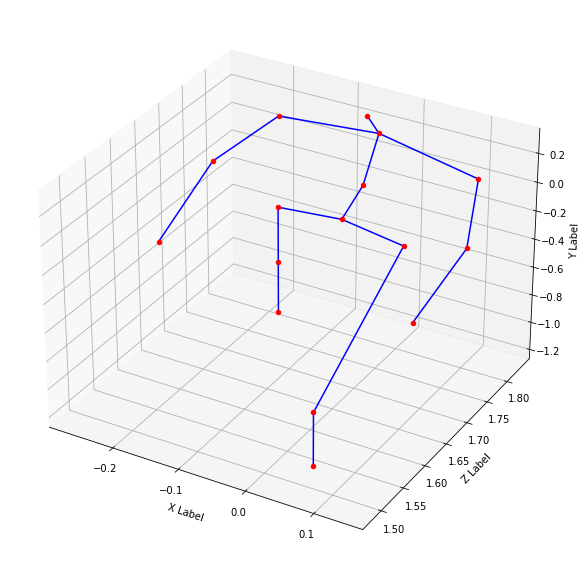

In [25]:
ui = Tk()
ui.title("User Interface")
ui.geometry('1200x600')
    
str = StringVar()
str1 = StringVar()
str2 = StringVar()
str3 = StringVar()
str4 = StringVar()
str5 = StringVar()

#subject combobox
combo = ttk.Combobox(ui, width = 20, textvariable=str)
combo['values'] = (1,2,3,4,5,6,7,8,9,10,11,12)
combo.grid(column = 1, row = 1)
combo.current(0)

highlevel = ttk.Combobox(ui, width = 20, textvariable=str1)
highlevel['values'] = ('Combine Big-Small Part','Combine Big-Big Part','Integrate','Prepare The Workspace','Slide The Panel')
highlevel.grid(column = 1, row = 2)
highlevel.current(0)

middlelevel = ttk.Combobox(ui, width = 20, textvariable=str2)
middlelevel['values'] = ('Pick Component','Screw Small Part','Pick Panel','Preparation','Put Panel', 'Pick Drawer', 'Put Drawer')
middlelevel.grid(column = 1, row = 3)
middlelevel.current(0)

lowlevel = ttk.Combobox(ui, width = 20, textvariable=str3)
lowlevel['values'] = ('Grasp','Transport Loaded','Assemble','Inspect','Position','Release Load')
lowlevel.grid(column = 1, row = 4)
lowlevel.current(0)

d = []
def clickMe():
    for i in range(len(data)):
        if data[446][i] == str1.get() and data[447][i]==str2.get() and data[448][i]==str3.get():
            d.append(i)
    row = ttk.Combobox(ui, width = 20,values = d, textvariable=str4)
    row.grid(column = 1, row = 6)
    row.current(0)
    action2 = ttk.Button(ui, text = "Choose row", command = clickMe2)
    action2.grid(column = 1, row = 7)
    

def clickMe2() :
    order = ttk.Combobox(ui, width = 20, textvariable=str5)
    order['values'] = ('xzy','zxy')
    order.grid(column = 1, row = 8)
    order.current(0)
    
    action5 = ttk.Button(ui, text = "Choose order", command = makeImg)
    action5.grid(column = 1, row = 9)
    
def makeImg():
    if str5.get() == 'zxy':
        a = int(str4.get())
        print(data.iloc[a:a+1,446:])

        x_index=[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47]
        y_index=[3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48]
        z_index=[4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49]

        label=['Head','Neck','Torso','Waist','Left Shoulder','Right Shoulder','Left Elbow','Right Elbow',
                   'Left Wrist','Right Wrist','Left Hip','Right Hip','Left Knee','Right Knee','Right Ankle','Left Ankle']

        fig = plt.figure(figsize = (10,20))
        ax = fig.add_subplot(111,projection = '3d')
        point=[[0]*3]*16
        for m in range(16):
            x=data.iloc[a,x_index[m]].copy()
            y=data.iloc[a,y_index[m]].copy()
            z=data.iloc[a,z_index[m]].copy()
            point[m]=[x,y,z]
            ax.scatter(z,x,y,c='r',marker='o')# 여기순서, +text뒤에 순서
            #ax.text(z,x,y,'%s' % (str(label[m])+'\n '+str(round(point[m][0],2))+','+str(round(point[m][1],2))+','+str(round(point[m][2],2))), size=10, zorder=2, color='k')

        list_line=[[0,1],[1,2],[2,3],[1,4],[1,5],[4,6],[5,7],[7,9],[6,8],[3,11],[3,10],[11,13],[10,12],[13,14],[12,15]]

        for j in range(15):
            x_values=[point[list_line[j][0]][0],point[list_line[j][1]][0]]
            y_values=[point[list_line[j][0]][1],point[list_line[j][1]][1]]
            z_values=[point[list_line[j][0]][2],point[list_line[j][1]][2]]
            ax.plot(z_values,x_values,y_values, color='b')#여기순서

        ax.set_xlabel('Z Label') #여기부터 세줄순서
        ax.set_ylabel('X Label')
        ax.set_zlabel('Y Label')
    
    else:
        a = int(str4.get())
        print(data.iloc[a:a+1,446:])

        x_index=[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47]
        y_index=[3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48]
        z_index=[4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49]

        label=['Head','Neck','Torso','Waist','Left Shoulder','Right Shoulder','Left Elbow','Right Elbow',
                   'Left Wrist','Right Wrist','Left Hip','Right Hip','Left Knee','Right Knee','Right Ankle','Left Ankle']

        fig = plt.figure(figsize = (10,20))
        ax = fig.add_subplot(111,projection = '3d')
        point=[[0]*3]*16
        for m in range(16):
            x=data.iloc[a,x_index[m]].copy()
            y=data.iloc[a,y_index[m]].copy()
            z=data.iloc[a,z_index[m]].copy()
            point[m]=[x,y,z]
            ax.scatter(x,z,y,c='r',marker='o')# 여기순서, +text뒤에 순서

        list_line=[[0,1],[1,2],[2,3],[1,4],[1,5],[4,6],[5,7],[7,9],[6,8],[3,11],[3,10],[11,13],[10,12],[13,14],[12,15]]

        for j in range(15):
            x_values=[point[list_line[j][0]][0],point[list_line[j][1]][0]]
            y_values=[point[list_line[j][0]][1],point[list_line[j][1]][1]]
            z_values=[point[list_line[j][0]][2],point[list_line[j][1]][2]]
            ax.plot(x_values,z_values,y_values, color='b')#여기순서

        ax.set_xlabel('X Label') #여기부터 세줄순서
        ax.set_ylabel('Z Label')
        ax.set_zlabel('Y Label')
    plt.savefig('savefig_default{}.png'.format(a))
    action3 = ttk.Button(ui, text = "Show Img", command = showImg)
    action3.grid(column = 1, row = 10)
    
def showImg() :
    load = Image.open('./savefig_default{}.png'.format(str4.get()))
    render = ImageTk.PhotoImage(load)
    img = Label(ui, image=render,width=600,height=600)
    img.image = render
    img.place(x=200, y=1)

data = pd.read_csv('./MVfinal_score_S{}-2.csv'.format(str.get()),header=None)

x=data.iloc[:,2]
y=data.iloc[:,3]
z=data.iloc[:,4]
action = ttk.Button(ui, text = "Activity", command = clickMe)
action.grid(column = 1, row = 5)


#모든 점수 추출!!!
ui.mainloop()

